# 复习

## 梯度

**梯度：**梯度的本意是一个向量（矢量），表示某一函数在该点的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。
$$\nabla f(x_0, y_0) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$

## 滤波/卷积

线性滤波可以说是图像吹最基本的方法，它可以允许我们对图像进行处理，产生很多不同的效果。

# 边缘提取

图像的边缘是指图像局部区域亮度变化显著的部分，该区域的灰度剖面一般可以看作是一个阶跃，即从一个灰度值在很小的缓冲区域内急剧变化到另一个灰度相差较大的灰度值。

**边缘有正负之分，就像导数有正值也有负值一样：由暗到亮为正，由亮到暗为负。**

求边缘幅度的算法：
 一阶导数：sobel、Roberts、prewitt等算子
 二阶导数：Laplacian、Canny算子
 
 **边缘检测**主要是图像的灰度变化的度量、检测和定位。
 
图像中的低频信号和高频信号也叫做低频分量和高频分量。
图像中的高频分量指的是图像强度(亮度/灰度)变化剧烈的地方，也就是边缘(轮廓)；图像的低频分量指的是图像强度(亮度/灰度)变换平缓的地方，也就是大片色块的地方。

**人眼对图像中的高频信号更为敏感。**

边缘检测的原理和步骤：
 
 原理：关于边缘检测的基础来自一个事实，即在边缘部分，像素值出现“跳跃”或者较大的变化。如果在此边缘部分求取一阶导数，就会看到极值的出现。而在一阶导数为极值的地方，二阶导数为0，基于这个原理，就可以进行边缘检测。
 
 步骤：（1）滤波；（2）增强；（3）检测
 
 1）滤波： 滤波： 边缘检测的算法主要是基于图像强度的一阶和二阶导数， 但导数通常对噪声很敏感，因此必须采用滤波器来改善与噪声有关的边缘检测器的性能。 常见的滤波方法主要有高斯滤波。
 2） 增强： 增强边缘的基础是确定图像各点邻域强度的变化值。 增强算法可以将图像灰度点邻域强度值有显著变化的点凸显出来。 在具体编程实现时， 可通过计算梯度幅值来确定。
3） 检测： 经过增强的图像， 往往邻域中有很多点的梯度值比较大， 而在特定的应用中， 这些点并不是我们要找的边缘点， 所以应该采用某种方法来对这些点进行取舍。 实际工程中， 常用的方法是通过阈值化方法来检测。

**Laplace算子**
$$Laplace(f) = \frac{\partial^2f}{\partial x^2}+\frac{\partial^2f}{\partial y^2}$$

**Canny边缘检测算法**
 Canny是目前最优秀的边缘检测算法，其目标是找到一个最优的边缘，其最优的边缘定义为：
 1. 好的检测：算法能够尽可能的标出图像的实际边缘
 2. 好的定位：标识出的边缘与实际图像的边缘尽可能接近
 3. 最小响应：图像中的边缘只能标记一次。
 
* 步骤
    1. 对图像进行灰度化；
    2. 对图像进行高斯滤波；
    3. 检测图像中的水平、垂直和对角边缘(如Prewitt，Sobel算子等)；
    4. 对梯度幅值进行非极大值抑制；
    5. 用双阈值算法检测和连接边缘；
    
**灰度化**
方法1：Gray=(R+G+B)/3
方法2：Gray=0.299R+0.587G+0.114B（这种参数考虑到了人眼的生理特点）
    
**高斯平滑**
根据待滤波的像素点及其邻域点的灰度值按照一定的参数规则进行加权平均。这样可以有效滤去理想图像中叠加的高频噪声。

高斯平滑水平和垂直方向呈高斯分布，更突出了中心点在像素平滑后的权重，相比于均值滤波而言，有着更好地平滑效果。

**高斯卷积核大小的选择将影响Canny检测器的性能**：尺寸越大，检测器对噪声的敏感度越低，但是边缘检测的定位误差也将略有增加。一般5×5是一个比较不错的trade off。

**非极大值抑制**
通常意义上是指寻找像素点局部最大值，将非极大值点所对应的灰度值置为0，这样可以剔除掉一大部分非边缘点。

非极大值抑制，简称NMS算法，英文为Non-Maximum Suppression。**思想是搜索局部最大值，抑制非极大值。NMS算法在不同应用中的具体实现不太一样，但思想是一样的。**

为什么要用非极大值抑制？
以目标检测为例：目标检测的过程中在同一目标位置上会产生 大量的候选框，这些候选框相互之间可能会重叠，此时我们需要利用非极大值抑制找到最大的目标边界框，消除冗余的边界。

对于重叠的候选框，计算他们的重叠部分，若大于规定阈值，则删除，低于阈值则保留。
对于无重叠的候选框，都保留。

1）将当前像素的梯度强度与沿正负梯度方向上的两个像素进行比较
2）如果当前像素的梯度强度与另外两个像素相比最大，则该像素点保留为边缘点，否则该像素点将被抑制(灰度值置为0)。

**用双阈值算法检测(滞后阈值)**
完成非极大值抑制后，会得到一个二值图像，非边缘点的灰度值均为0，可能为边缘的局部灰度极大值点可设置其灰度为128。这样一个检测结果还是包含了很多由噪声及其它原因造成的家边缘。因此还需要进一步的处理。

1.**双阈值检测：**
* 如果边缘像素的梯度值高于高阈值，则将其标记为强边缘像素；
* 如果边缘像素的梯度值小于高阈值并且大于低阈值，则将其标记为弱边缘像素；
* 如果边缘像素的梯度值小于低阈值，则会被抑制。  
**大于高阈值为强边缘，小于低阈值不是边缘。介于中间是弱边缘。
阈值的选择取决于给定输入图像的内容。**

2.**抑制孤立低阈值点：**

到目前为止，被划分为强边缘的像素点已经被确定为边缘，因为它们视同图像中的真实边缘中提取出来的。然而，对于若边缘像素，将会有一些争论，因为这些像素可以从真实边缘提取也可以是因噪声或颜色变化引起的。

为了获得准确的结果，应该一直由或者引起的弱边缘：
* 通常，由真实边缘因此的弱边缘像素将连接到强边缘像素，而噪声响应未连接。
* 为了跟踪边缘连接，通过查看弱边缘像素及其8个邻域像素，只要其中一个维强边缘像素，则该弱边缘就可以保留为真实的边缘。

**canny相比较于sobel多做了很多优化。**

## Canny代码

In [1]:
import cv2
import numpy as np

'''
cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient ]]])
必要参数：
参数1：需要处理的原图像，该图像必须为单通道的灰度图；
参数2：滞后阈值1；
参数3：滞后阈值2；
'''

img = cv2.imread('images/lena.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('canny', cv2.Canny(gray, 200, 300))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
'''
Canny边缘检测：优化的程序
'''
import cv2
import numpy as np

def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray, (3, 3), 0) # 高斯滤波
    detected_edges = cv2.Canny(detected_edges,
                              lowThreshold,
                              lowThreshold*ratio,
                              apertureSize=kernel_size) # 边缘检测
    
    # just add some colours to edges from original image.
    dst = cv2.bitwise_and(img, img, mask=detected_edges) # 用原始颜色添加到检测的边缘上
    cv2.imshow('canny demo', dst)
    
lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3

img = cv2.imread('images/lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow('canny demo')

# 设置调节杠
'''
cv2.createTrackbar()
参数1：trackbar对象的名字；
参数2：trackbar对象所在面板的名字；
参数3：trackbar对象的默认值，也是调节的对象；
参数4：trackbar上调节的范围(0~count)；
参数5：调节trackbar时调用的回到函数名。
'''
cv2.createTrackbar('Min threshold', 'canny demo', lowThreshold, max_lowThreshold, CannyThreshold)

CannyThreshold(0)
if cv2.waitKey(0) == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()

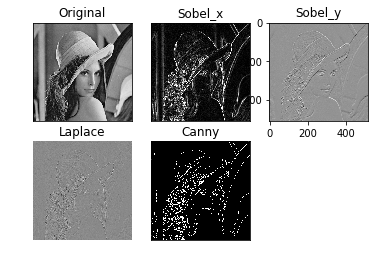

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.png', 1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

'''
Sobel算子函数：
dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
必须参数：
参数1：需要处理的图像；
参数2：图像的深度，-1表示采用与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
参数3和4：dx和dy表示的是求导的阶数，0表示这个方向上没有求导，一般为0、1、2。
其后是可选参数：
dst 是目标图像；
ksize 是Sobel算子的大小，必须为1、3、5、7；
scale 是缩放导数的比例常数，默认情况下没有伸缩系数；
delta 是一个可选增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
borderType 是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。
'''

img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3) # 对x求导
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3) # 对y求导

img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# Laplace 算子
img_laplace = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)

# Canny 算子
img_canny = cv2.Canny(img_gray, 100, 150)

plt.subplot(231), plt.imshow(img_gray, 'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_sobel_x, 'gray'), plt.title('Sobel_x')
plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(img_sobel_y, 'gray'), plt.title('Sobel_y')
# plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_laplace, 'gray'), plt.title('Laplace')
# plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(235), plt.imshow(img_canny, 'gray'), plt.title('Canny')
plt.xticks([]), plt.yticks([])
plt.show()

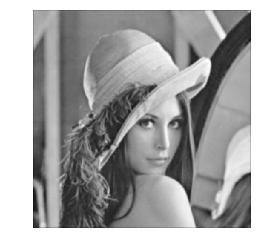

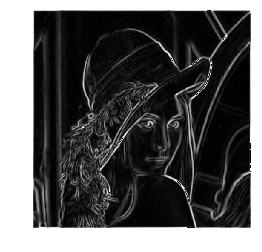

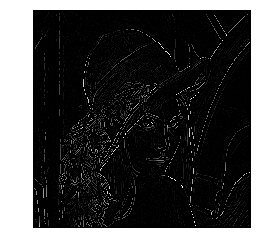

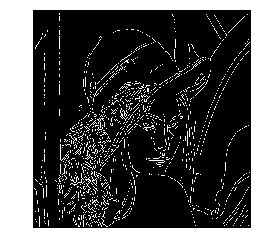

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

if __name__ == '__main__':
    pic_path = 'images/lena.png'
    img = plt.imread(pic_path)
    if pic_path[-4:] == '.png': # .png图片在这里的存储格式是0到1的浮点数，所以要扩展到255再计算
        img = img * 255 # 还是浮点数类型
    img = img.mean(axis=-1) # 取均值就是灰度化了
    
    # 1.高斯平滑
    sigma = 1.52 # 高斯平滑时的高斯核参数，标准差，可调
    dim = int(np.round(6 * sigma + 1)) # round 是四舍五入函数，根据标准差求高斯核是几乘几的，也就是维度
    if dim % 2 == 0: # 最好是奇数，不是的话加1
        dim += 1
    Gaussian_filter = np.zeros([dim, dim]) # 存储高斯核，这是数组不是列表了
    tmp = [i-dim//2 for i in range(dim)] # 生成一个关于0点对称的序列
    n1 = 1 / (2*math.pi*sigma**2) # 计算高斯核
    n2 = -1 / (2*sigma**2)
    for i in range(dim):
        for j in range(dim):
            Gaussian_filter[i, j] = n1 * math.exp(n2 * (tmp[i]**2 + tmp[j]**2))
    
    Gaussian_filter = Gaussian_filter / Gaussian_filter.sum()
    dx, dy = img.shape
    img_new = np.zeros(img.shape) # 存储平滑之后的图像，zeros函数得到的是浮点型数据
    tmp = dim // 2
    img_pad = np.pad(img, ((tmp, tmp), (tmp, tmp)), 'constant') # 边缘填补
    for i in range(dx):
        for j in range(dy):
            img_new[i, j] = np.sum(img_pad[i:i+dim, j:j+dim] * Gaussian_filter)
    
    plt.figure(1)
    plt.imshow(img_new.astype(np.uint8), cmap='gray') # 此时的img_new是255的浮点型数据，强制类型转换
    plt.axis('off')
    
    # 2.求梯度。以下两个是滤波求梯度用的sobel矩阵（检测图像中的水平、垂直和对角边缘）
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    img_tidu_x = np.zeros(img_new.shape) # 存储梯度图像
    img_tidu_y = np.zeros([dx, dy])
    img_tidu = np.zeros(img_new.shape)
    img_pad = np.pad(img_new, ((1, 1), (1, 1)), 'constant') # 边缘填补，根据上面矩阵结构所写1
    for i in range(dx):
        for j in range(dy):
            img_tidu_x[i, j] = np.sum(img_pad[i:i+3, j:j+3]*sobel_kernel_x) # x方向
            img_tidu_y[i, j] = np.sum(img_pad[i:i+3, j:j+3]*sobel_kernel_y) # y方向
            img_tidu[i, j] = np.sqrt(img_tidu_x[i, j]**2 + img_tidu_y[i, j]**2)
    img_tidu_x[img_tidu_x==0] = 0.00000001
    angle = img_tidu_y/img_tidu_x
    plt.figure(2)
    plt.imshow(img_tidu.astype(np.uint8), cmap='gray')
    plt.axis('off')
    
    # 3. 非极大值抑制
    img_yizhi = np.zeros(img_tidu.shape)
    for i in range(1, dx-1):
        for j in range(1, dy-1):
            flag = True # 在8邻域内是否要抹去做个标记
            temp = img_tidu[i-1:i+2, j-1:j+2] # 梯度幅值的8邻域矩阵
            if angle[i, j] <= -1: # 使用线性插值法判断抑制与否
                num_1 = (temp[0, 1] - temp[0, 0]) / angle[i, j] + temp[0, 1]
                num_2 = (temp[2, 1] - temp[2, 2]) / angle[i, j] + temp[2, 1]
                if not (img_tidu[i, j] > num_1 and img_tidu[i, j] > num_2):
                    flag = False
            elif angle[i, j] >= 1:
                num_1 = (temp[0, 2] - temp[0, 1]) / angle[i, j] + temp[0, 1]
                num_2 = (temp[2, 0] - temp[2, 1]) / angle[i, j] + temp[2, 1]
                if not (img_tidu[i, j] > num_1 and img_tidu[i, j] > num_2):
                    flag = False
            elif angle[i, j] > 0:
                num_1 = (temp[0, 2] - temp[1, 2]) * angle[i, j] + temp[1, 2]
                num_2 = (temp[2, 0] - temp[1, 0]) * angle[i, j] + temp[1, 0]
                if not (img_tidu[i, j] > num_1 and img_tidu[i, j] > num_2):
                    flag = False
            elif angle[i, j] < 0:
                num_1 = (temp[1, 0] - temp[0, 0]) * angle[i, j] + temp[1, 0]
                num_2 = (temp[1, 2] - temp[2, 2]) * angle[i, j] + temp[1, 2]
                if not (img_tidu[i, j] > num_1 and img_tidu[i, j] > num_2):
                    flag = False
            if flag:
                img_yizhi[i, j] = img_tidu[i, j]
                    
    plt.figure(3)
    plt.imshow(img_yizhi.astype(np.uint8), cmap='gray')
    plt.axis('off')
    
    # 双阈值检测，连接边缘。遍历所有一定是边的点，查看8邻域是否存在有可能是边的点，进栈
    lower_boundary = img_tidu.mean() * 0.5
    high_boundary = lower_boundary * 3 # 这里设置高阈值是低阈值的三倍
    zhan = []
    for i in range(1, img_yizhi.shape[0]-1): # 外圈不考虑
        for j in range(1, img_yizhi.shape[1]-1):
            if img_yizhi[i, j] >= high_boundary: # 取，一定是边的点
                img_yizhi[i, j] = 255
                zhan.append([i, j])
            elif img_yizhi[i, j] <= lower_boundary: # 舍
                img_yizhi[i, j] = 0
                
    while not len(zhan) == 0:
        temp_1, temp_2 = zhan.pop() # 出栈
        a = img_yizhi[temp_1-1:temp_1+2, temp_2-1:temp_2+2]
        if (a[0, 0] < high_boundary) and (a[0, 0] > lower_boundary):
            img_yizhi[temp_1-1, temp_2-1] = 255 # 这个像素点标记为边缘
            zhan.append([temp_1-1, temp_2-1]) # 进栈
        if (a[0, 1] < high_boundary) and (a[0, 1] > lower_boundary):
            img_yizhi[temp_1 - 1, temp_2] = 255
            zhan.append([temp_1 - 1, temp_2])
        if (a[0, 2] < high_boundary) and (a[0, 2] > lower_boundary):
            img_yizhi[temp_1 - 1, temp_2 + 1] = 255
            zhan.append([temp_1 - 1, temp_2 + 1])
        if (a[1, 0] < high_boundary) and (a[1, 0] > lower_boundary):
            img_yizhi[temp_1, temp_2 - 1] = 255
            zhan.append([temp_1, temp_2 - 1])
        if (a[1, 2] < high_boundary) and (a[1, 2] > lower_boundary):
            img_yizhi[temp_1, temp_2 + 1] = 255
            zhan.append([temp_1, temp_2 + 1])
        if (a[2, 0] < high_boundary) and (a[2, 0] > lower_boundary):
            img_yizhi[temp_1 + 1, temp_2 - 1] = 255
            zhan.append([temp_1 + 1, temp_2 - 1])
        if (a[2, 1] < high_boundary) and (a[2, 1] > lower_boundary):
            img_yizhi[temp_1 + 1, temp_2] = 255
            zhan.append([temp_1 + 1, temp_2])
        if (a[2, 2] < high_boundary) and (a[2, 2] > lower_boundary):
            img_yizhi[temp_1 + 1, temp_2 + 1] = 255
            zhan.append([temp_1 + 1, temp_2 + 1])
    
    for i in range(img_yizhi.shape[0]):
        for j in range(img_yizhi.shape[1]):
            if img_yizhi[i, j] != 0 and img_yizhi[i, j] != 255:
                img_yizhi[i, j] = 0
                
    # 绘图
    plt.figure(4)
    plt.imshow(img_yizhi.astype(np.uint8), cmap='gray')
    plt.axis('off') # 关闭坐标刻度值
    plt.show()

# 相机模型

世界坐标系
摄像机坐标系
图像物理坐标系
图像像素坐标系

前三个都是长度单位，最后一个是像素单位。

相机成像
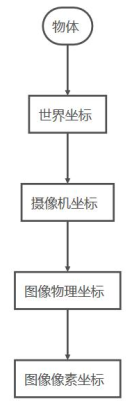

世界坐标系 -> 摄像机坐标系：
* 平移+旋转（欧拉变换）
$$a'=Ra+t$$

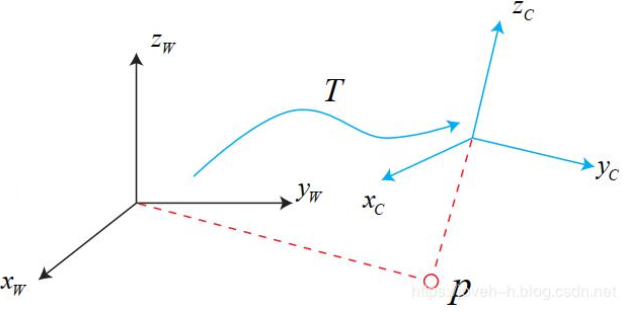

摄像机坐标系 -> 图像物理坐标系
相似三角形
$$\begin{cases}
X' = f\frac{X_c}{Z_c} \\
Y' = f \frac{Y_c}{Z_c}
\end{cases}$$
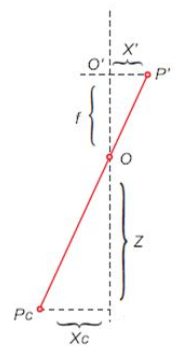

图像物理坐标系 -> 图像像素坐标系
$$\begin {cases}
u = \frac{x}{dx} + u_0 \\
v = \frac{y}{dy} + v_0
\end{cases}$$
dx 和 dy 表示：x 方向和 y 方向的一个像素分别占多少个(可能是小数)长度单位。
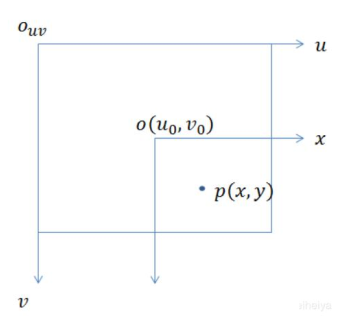

# 畸变矫正

## 镜头畸变

透镜由于制造精度以及组装工艺的偏差引入畸变，导致原始图像的失真。
镜头的畸变分为径向畸变和切向畸变两类。

* 径向畸变：
由透镜的形状因此的畸变称为径向畸变，透镜径向畸变后点位的偏移示意图。
    * 枕形畸变
    * 桶形畸变

* 切向畸变：
由于透镜本身与相机传感器平面(成像平面)或图像不平行而产生的。

## 透视变换(Perspective Transformation)
透视变换是将图片投影到一个新的视平面(Viewing Plane)，也称作投影映射(Projective Mapping)。
我们常说的仿射变换是透视变换的一个特例。
透视变换的目的是把现实中为直线的物体，在图片上可能呈现为斜线，通过透视变换成直线的变换。
仿射变换(Affine Transformation或Affine Map)，又称仿射映射，是指在几何中，图像进行从一个向量空间进行一次线性变换和一次平移，变换为到另一个向量空间的过程。

In [24]:
import numpy as np

def WarpPerspectiveMatrix(src, dst):
    assert src.shape[0] == dst.shape[0] and src.shape[0] >= 4
    
    nums = src.shape[0]
    A = np.zeros((2*nums, 8)) # A*warpMatrix=B
    B = np.zeros((2*nums, 1))
    for i in range(0, nums):
        A_i = src[i, :]
        B_i = dst[i, :]
        A[2*i, :] = [A_i[0], A_i[1], 1, 0, 0, 0, 
                    -A_i[0]*B_i[0], -A_i[1]*B_i[0]]
        B[2*i] = B_i[0]
        
        A[2*i+1, :] = [0, 0, 0, A_i[0], A_i[1], 1,
                      -A_i[0]*B_i[1], -A_i[1]*B_i[1]]
        B[2*i+1] = B_i[1]
        
    A = np.mat(A)
    # 用A.I求出A的逆矩阵，然后与B相乘，求出warpMatrix
    warpMatrix = A.I * B # 求出a_11, a_12, a_13, a_21, a_22, a_23, a_31, a_32
    
    # 之后为结果的后处理
    warpMatrix = np.array(warpMatrix).T[0]
    warpMatrix = np.insert(warpMatrix, warpMatrix.shape[0], values=1.0, axis=0) # 插入a_33=1
    warpMatrix = warpMatrix.reshape((3, 3))
    return warpMatrix

if __name__ == '__main__':
    print('warpMatrix')
    src = [[10.0, 457.0], [395.0, 291.0], [624.0, 291.0], [1000.0, 457.0]]
    src = np.array(src)
    
    dst = [[46.0, 920.0], [46.0, 100.0], [600.0, 100.0], [600.0, 920.0]]
    dst = np.array(dst)
    
    warpMatrix = WarpPerspectiveMatrix(src, dst)
    print(warpMatrix)

warpMatrix
[[-5.01338334e-01 -1.35357643e+00  5.82386716e+02]
 [-2.41793700e-16 -4.84035391e+00  1.38781980e+03]
 [ 7.65500265e-20 -4.14856327e-03  1.00000000e+00]]


In [27]:
import cv2
import numpy as np

img = cv2.imread('images/photo1.jpg')

result = img.copy()

# img = cv2.GaussianBlur(img, (3, 3), 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imwrite('canny.jpg', edges)

'''
注意：这里src和dst的输入并不是图像，而是图像对应的顶点坐标。
'''
src = np.float32([[207, 151], [517, 285], [17, 601], [343, 731]])
dst = np.float32([[0, 0], [337, 0], [0, 488], [337, 488]])
# 生成透视变换矩阵，进行透视变换
m = cv2.getPerspectiveTransform(src, dst)
result = cv2.warpPerspective(result, m, (337, 488))
cv2.imshow('src', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()